In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from Experiment import Experiment2D
from figure_functions import get_plot_options, loss_boxplot

In [2]:
# Set the plotting options for matplotlib:
full_params, half_params = get_plot_options()

# Use either the half_params or full_params dictionary for 
# full-width or half-width figures, respectively
plot_params = half_params.copy()

# Make customizations here:
plot_params['figure.figsize'] = (2.5, 1.5)

# Reset to the defaults, then update rcparams to plot_params dictionary of options:
plt.rcdefaults()
plt.rcParams.update(plot_params)

In [3]:
# Load up the different experiments for analysis
expt = Experiment2D(experiment_name="S3-NLP-Expt1-L200-a", data_file_prefix='S3-NLP')

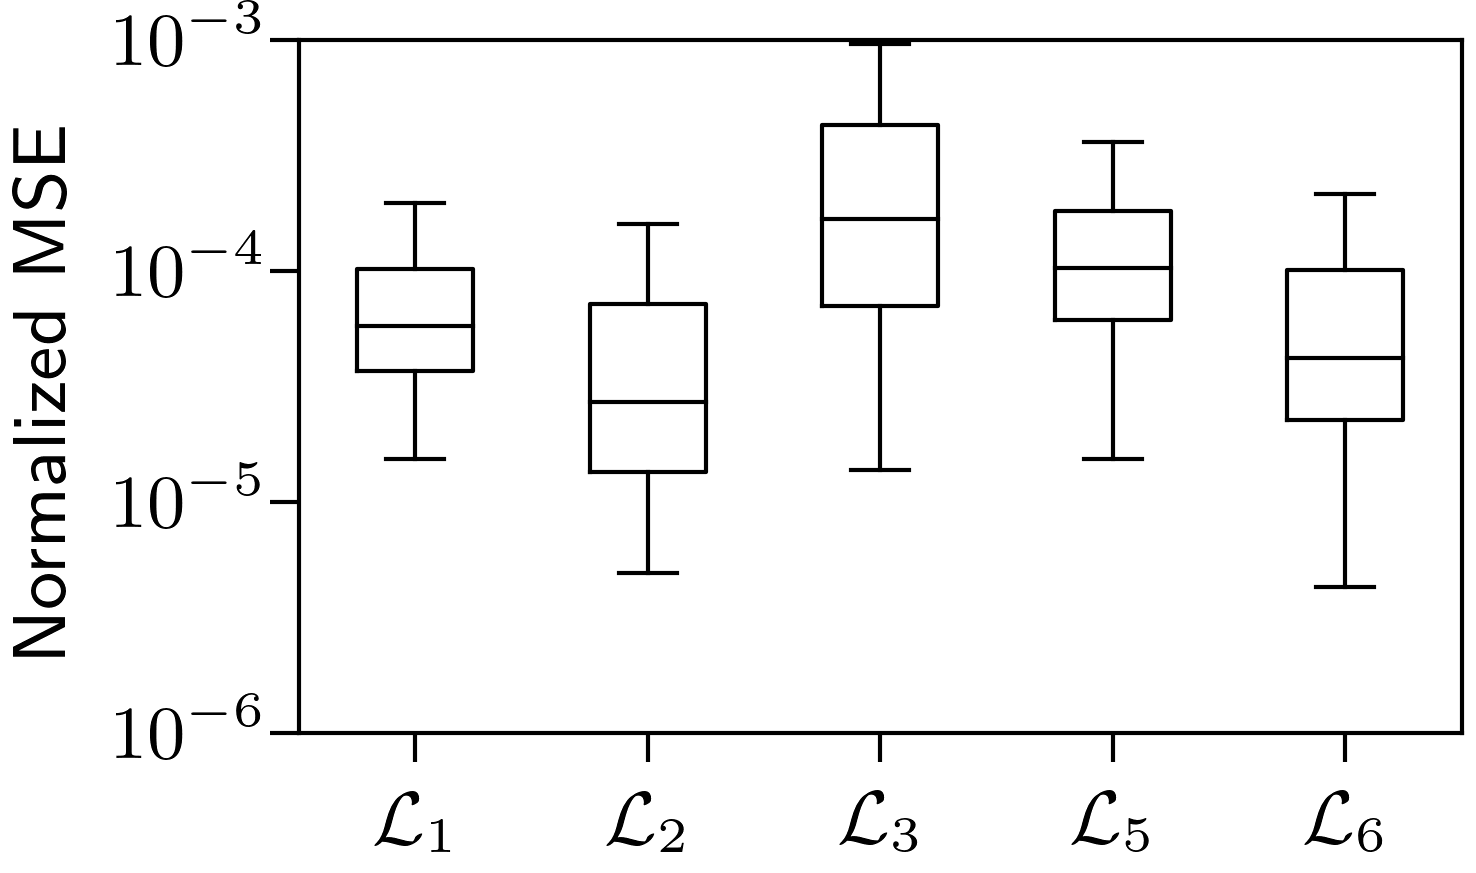

In [4]:
# Make plot, save, and show
loss_boxplot(expt, dataset_name='test1')
plt.savefig("./figures/Fig11-summary.svg")
plt.show()